In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import math

In [2]:
# List of 50 stocks
tickers = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "NVDA", "META", "BRK-B", "JPM", "V",
    "UNH", "JNJ", "XOM", "PG", "HD", "MA", "CVX", "ABBV", "PEP", "LLY",
    "KO", "MRK", "AVGO", "COST", "MCD", "TMO", "DIS", "CSCO", "ACN", "AMD",
    "CMCSA", "ADBE", "NFLX", "PFE", "DHR", "NKE", "TXN", "LIN", "UNP", "INTC",
    "HON", "IBM", "PM", "CAT", "GE", "NOW", "GS", "BLK", "AXP", "DE"
]

# Download historical data for the past 1 month
# Data is a multi-indexed dataframe with ohlc on the first row and the stock ticker on the second row.
data = yf.download(tickers, period="1y", interval="1d")

[***                    6%%                      ]  3 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[*****                 10%%                      ]  5 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[*******               14%%                      ]  7 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[*********             18%%                      ]  9 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[************          24%%                      ]  12 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[*************         28%%                      ]  14 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[***************       32%%                      ]  16 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[*******************   40%%                      ]  20 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[********************  42%%                      ]  21 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************48%%                      ]  24 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************54%%                      ]  27 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************56%%*                     ]  28 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************60%%***                   ]  30 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************64%%*****                 ]  32 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************70%%********              ]  35 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************72%%*********             ]  36 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************78%%***********           ]  39 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************80%%************          ]  40 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************86%%***************       ]  43 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************88%%****************      ]  44 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************92%%******************    ]  46 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************96%%********************  ]  48 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[*********************100%%**********************]  50 of 50 completed


/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [3]:
data.head()

Adj Close                                                  \
                  AAPL        ABBV         ACN        ADBE         AMD   
Date                                                                     
2024-02-12  186.270447  166.987061  362.937317  611.840027  171.910004   
2024-02-13  184.170364  167.199326  358.373840  601.890015  171.539993   
2024-02-14  183.284546  168.289597  366.443939  604.659973  178.699997   
2024-02-15  182.995926  170.383331  366.967468  590.440002  176.759995   
2024-02-16  181.453217  171.251709  364.962250  546.659973  173.869995   

                                                                        ...  \
                  AMZN        AVGO         AXP         BLK       BRK-B  ...   
Date                                                                    ...   
2024-02-12  172.339996  124.818779  209.932541  783.060974  397.709991  ...   
2024-02-13  168.639999  123.501518  207.370941  759.923523  394.799988  ...   
2024-02-14  170.979996  124.544472  208.587463  767.082642  398.679993  ...   
2024-02-15  169.800003  124.825691  210.199585  779.437561  403.450012  ...   
2024-02-16  169.509995  122.892723  210.229263  775.481995  405.989990  ...   

              Volume                                                          \
                 PFE       PG       PM      TMO       TSLA      TXN      UNH   
Date                                                                           
2024-02-12  30323700  5482000  4022300  1073000   95498600  3853000  3194000   
2024-02-13  37927500  6046800  5935300  1268000   86759500  5357900  3436000   
2024-02-14  25270200  5727300  5534900  1297000   81203000  4528000  1918500   
2024-02-15  36111600  6249200  8765600  1519000  120831800  3725300  2292100   
2024-02-16  35913500  6617600  4382200  1028200  111173600  3167600  2135500   

                                        
                UNP        V       XOM  
Date                                    
2024-02-12  2259600  3676200  18173100  
2024-02-13  2664100  5493800  18917400  
2024-02-14  2579500  4218400  17651300  
2024-02-15  2252300  4834800  23196300  
2024-02-16  2201300  6630100  20146700  

[5 rows x 300 columns]

In [4]:
# summary statistics of 'data' dataframe
data.describe()

Adj Close                                                              \
             AAPL        ABBV         ACN        ADBE         AMD        AMZN   
count  251.000000  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   211.638306  175.395378  338.854138  506.140477  152.939761  192.529841   
std     25.938360   12.401397   28.489950   44.959699   21.307774   19.517129   
min    164.224564  150.744324  279.392487  405.920013  107.559998  161.020004   
25%    185.955009  165.649307  314.192596  475.690002  138.514999  179.110001   
50%    222.011383  173.533554  343.899994  504.480011  154.429993  186.330002   
75%    229.440025  187.779205  361.180008  543.965027  165.760002  200.724998   
max    258.735504  201.965424  398.250000  611.840027  211.380005  242.059998   

                                                        ...        Volume  \
             AVGO         AXP          BLK       BRK-B  ...           PFE   
count  251.000000  251.000000   251.000000  251.000000  ...  2.510000e+02   
mean   163.919905  255.964503   882.778244  436.448766  ...  3.806448e+07   
std     33.557363   32.717958   106.825294   25.961801  ...  1.578035e+07   
min    119.376137  207.370941   734.400391  394.799988  ...  1.518010e+07   
25%    135.125206  229.636246   786.130859  409.574997  ...  2.854580e+07   
50%    161.646896  246.664017   852.854797  440.839996  ...  3.535040e+07   
75%    175.958542  285.628464   995.659943  459.514999  ...  4.390870e+07   
max    249.331955  325.869995  1075.500000  483.079987  ...  1.310744e+08   

                                                                             \
                 PG            PM           TMO          TSLA           TXN   
count  2.510000e+02  2.510000e+02  2.510000e+02  2.510000e+02  2.510000e+02   
mean   6.574499e+06  5.376782e+06  1.556367e+06  9.114945e+07  5.557224e+06   
std    2.757144e+06  2.245874e+06  6.774560e+05  3.308301e+07  2.336210e+06   
min    2.460800e+06  1.647800e+06  4.887000e+05  3.716760e+07  1.950900e+06   
25%    5.058650e+06  3.954900e+06  1.119400e+06  6.807345e+07  4.140450e+06   
50%    6.009800e+06  4.906900e+06  1.397900e+06  8.308710e+07  5.081900e+06   
75%    7.199800e+06  5.977250e+06  1.830200e+06  1.044846e+08  6.213250e+06   
max    2.864750e+07  1.837440e+07  6.150900e+06  2.438697e+08  1.907880e+07   

                                                               
                UNH           UNP             V           XOM  
count  2.510000e+02  2.510000e+02  2.510000e+02  2.510000e+02  
mean   4.100507e+06  2.389344e+06  6.938554e+06  1.581146e+07  
std    2.478436e+06  8.352393e+05  3.698457e+06  5.398170e+06  
min    1.581900e+06  6.690000e+05  2.684100e+06  7.732900e+06  
25%    2.658000e+06  1.819600e+06  4.850600e+06  1.247315e+07  
50%    3.332800e+06  2.252300e+06  5.981800e+06  1.481850e+07  
75%    4.556550e+06  2.792050e+06  7.985500e+06  1.757170e+07  
max    2.273420e+07  6.802600e+06  2.781090e+07  5.222060e+07  

[8 rows x 300 columns]

In [5]:
# Check for missing values and sort in descending format to capture values faster.
data.isnull().sum().sort_values(ascending=False)

Volume     XOM     0
Adj Close  AAPL    0
           ABBV    0
           ACN     0
           ADBE    0
                  ..
           DHR     0
           DE      0
           CVX     0
           CSCO    0
           COST    0
Length: 300, dtype: int64

In [6]:
''' 
returns stores the percentage returns of each of the assets on a daily basis
Alternatively you can use 
returns = df.loc["adj_close"].pct_change() * 100
'''

returns = ((data["Adj Close"] - data["Adj Close"].shift(1)) / data["Adj Close"].shift(1)) * 100
print(returns)

                AAPL      ABBV       ACN      ADBE       AMD      AMZN  \
Date                                                                     
2024-02-12       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-13 -1.127437  0.127115 -1.257373 -1.626244 -0.215235 -2.146917   
2024-02-14 -0.480978  0.652079  2.251866  0.460210  4.173956  1.387569   
2024-02-15 -0.157471  1.244126  0.142867 -2.351730 -1.085620 -0.690135   
2024-02-16 -0.843029  0.509661 -0.546430 -7.414814 -1.634985 -0.170794   
...              ...       ...       ...       ...       ...       ...   
2025-02-05 -0.141752  0.947619  1.692969 -0.590602 -6.267781 -2.433281   
2025-02-06  0.322622  0.636246 -2.739486 -0.509565 -1.651637  1.126309   
2025-02-07 -2.396879 -1.228168 -0.351109 -0.535137 -2.360209 -4.053095   
2025-02-10  0.118739 -0.136416  0.235764  4.163299  2.714769  1.741220   
2025-02-11  2.183177  0.782813  0.806429  1.711372  0.561183 -0.162994   

                AVGO       AXP       

In [7]:
log_returns = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
print(log_returns)

                AAPL      ABBV       ACN      ADBE       AMD      AMZN  \
Date                                                                     
2024-02-12       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-13 -0.011338  0.001270 -0.012653 -0.016396 -0.002155 -0.021703   
2024-02-14 -0.004821  0.006500  0.022269  0.004592  0.040892  0.013780   
2024-02-15 -0.001576  0.012365  0.001428 -0.023798 -0.010916 -0.006925   
2024-02-16 -0.008466  0.005084 -0.005479 -0.077041 -0.016485 -0.001709   
...              ...       ...       ...       ...       ...       ...   
2025-02-05 -0.001419  0.009432  0.016788 -0.005924 -0.064728 -0.024634   
2025-02-06  0.003221  0.006342 -0.027777 -0.005109 -0.016654  0.011200   
2025-02-07 -0.024261 -0.012358 -0.003517 -0.005366 -0.023885 -0.041375   
2025-02-10  0.001187 -0.001365  0.002355  0.040790  0.026786  0.017262   
2025-02-11  0.021597  0.007798  0.008032  0.016969  0.005596 -0.001631   

                AVGO       AXP       

In [8]:
# Select 'AAPL' stock data and extract the 'Close' column
close_prices = data['Close']

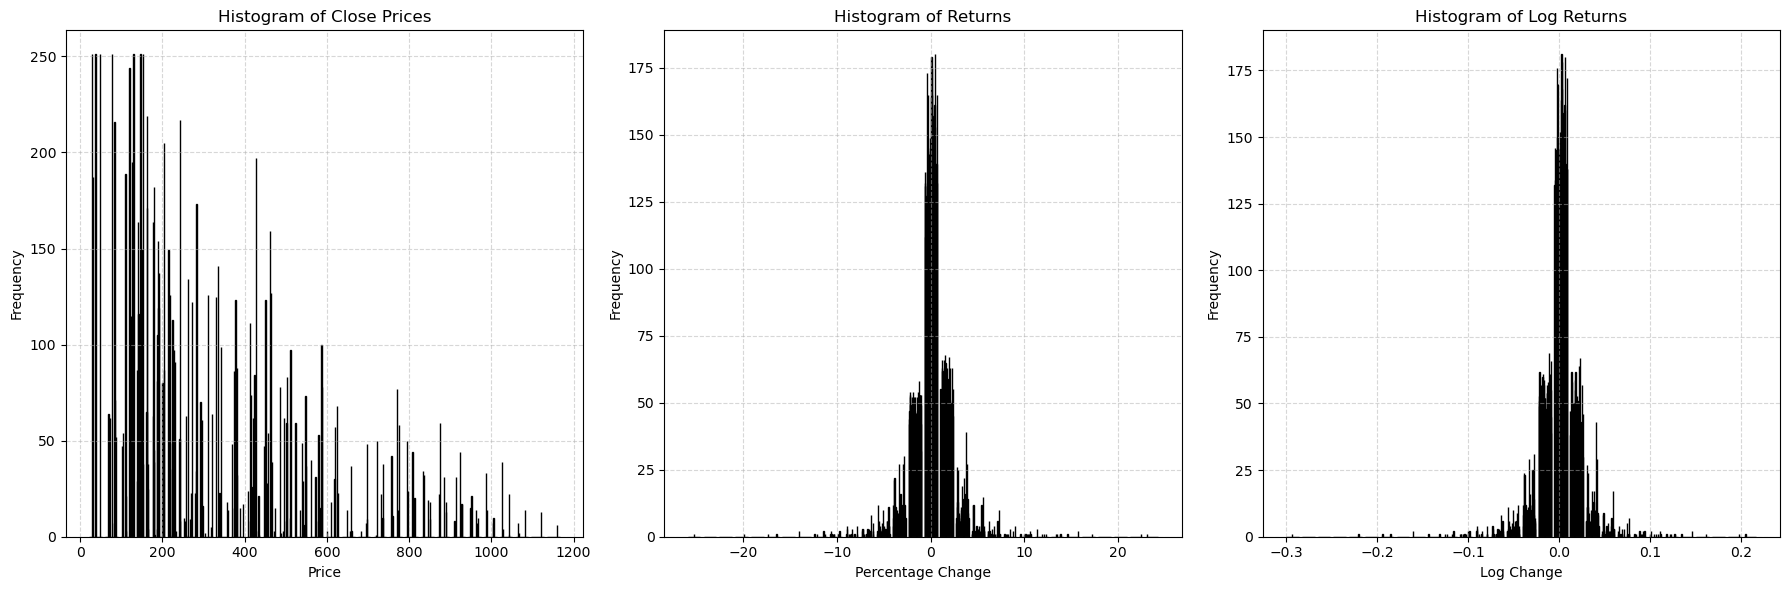

In [9]:
# Create a figure and two subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# First subplot (left side)
axes[0].hist(close_prices, bins=30, edgecolor='black')
axes[0].set_title('Histogram of Close Prices')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, linestyle='--', alpha=0.5)

# Second subplot (right side)
axes[1].hist(returns, bins=30, edgecolor='black')
axes[1].set_title('Histogram of Returns')
axes[1].set_xlabel('Percentage Change')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, linestyle='--', alpha=0.5)

# Third subplot (right side)
axes[2].hist(log_returns, bins=30, edgecolor='black')
axes[2].set_title('Histogram of Log Returns')
axes[2].set_xlabel('Log Change')
axes[2].set_ylabel('Frequency')
axes[2].grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping of labels
plt.show()

The histograms of adjusted closing prices and percentage returns reveal distinct statistical characteristics of the dataset.

1. Adjusted Closing Prices: The histogram exhibits a right-skewed (positively skewed) distribution, indicating that while most stock prices cluster at lower values, a few stocks have significantly higher prices. This skewness suggests a long right tail, which is characteristic of financial data where a few large-cap stocks (e.g., AMZN, BRK-B) have disproportionately high prices compared to smaller-cap stocks.

2. Percentage Returns: The histogram of daily percentage returns appears approximately normally distributed, with most values concentrated around zero. This suggests that stock returns exhibit symmetry, with gains and losses distributed fairly evenly around the mean. This aligns with the fundamental assumption in many financial models, such as the log-normal distribution of prices and the normality of short-term returns under the Efficient Market Hypothesis.

# Statistical Interpretation:
The right-skewness in prices implies that using raw price values in models can lead to misleading conclusions due to the large variation in scale across stocks.
The near-normal distribution of percentage returns suggests that using returns instead of prices provides a stationary and scale-independent measure of stock performance, making it more suitable for statistical modeling and risk analysis.

---

# Creating New Features
- Daily log returns
- Daily risk (standard deviation)

In [10]:
# Assign back to the original dataframe under a new column level
log_returns.columns = pd.MultiIndex.from_product([['Log Returns'], log_returns.columns])  # Add new top-level index

In [11]:
# Merge with the original dataframe
data = data.join(log_returns)

In [12]:
data['Log Returns'].head()

,AAPL,ABBV,ACN,ADBE,AMD,AMZN,AVGO,AXP,BLK,BRK-B,...,PFE,PG,PM,TMO,TSLA,TXN,UNH,UNP,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-13,-0.011338,0.001270,-0.012653,-0.016396,-0.002155,-0.021703,-0.010609,-0.012277,-0.029993,-0.007344,...,-0.025262,-0.005361,-0.009041,-0.015220,-0.022089,-0.026611,-0.001527,-0.007261,0.002687,-0.008646
2024-02-14,-0.004821,0.006500,0.022269,0.004592,0.040892,0.013780,0.008409,0.005849,0.009377,0.009780,...,0.005178,-0.004104,0.000336,0.017795,0.025167,0.006482,0.000174,0.018156,0.006325,-0.004946
2024-02-15,-0.001576,0.012365,0.001428,-0.023798,-0.010916,-0.006925,0.002255,0.007699,0.015978,0.011894,...,0.014647,0.008828,-0.002694,0.000547,0.060353,0.017830,0.007593,0.001758,0.012246,0.028256
2024-02-16,-0.008466,0.005084,-0.005479,-0.077041,-0.016485,-0.001709,-0.015606,0.000141,-0.005088,0.006276,...,0.003991,0.003179,0.007502,-0.001332,-0.002498,-0.002055,0.001285,-0.015931,-0.008650,0.000000


In [13]:
#Calculate the standard deviation of the entire dataset
# std_dev_entire = data['Log Returns'].std().sort_values(ascending=False)
# std_dev_entire.plot(kind='bar', figsize=(12,6))
# plt.title('Population Standard Deviation of Assets')
# plt.xlabel('Assets')
# plt.ylabel('Standard Deviation')
# plt.show()

In [14]:
rolling_std_dev = data['Log Returns'].rolling(window=5).std()
print(rolling_std_dev)

                AAPL      ABBV       ACN      ADBE       AMD      AMZN  \
Date                                                                     
2024-02-12       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-13       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-14       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-15       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-16       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2025-02-05  0.019686  0.020603  0.006976  0.011271  0.041078  0.017689   
2025-02-06  0.020044  0.019885  0.018626  0.009230  0.039185  0.017401   
2025-02-07  0.022129  0.016884  0.018284  0.004753  0.039131  0.025263   
2025-02-10  0.016082  0.008434  0.018302  0.020060  0.043389  0.027616   
2025-02-11  0.016346  0.009016  0.016826  0.020613  0.034365  0.024687   

                AVGO       AXP       

In [15]:
# Assign back to the original dataframe under a new column level
rolling_std_dev.columns = pd.MultiIndex.from_product([['Daily Risk'], rolling_std_dev.columns])  # Add new top-level index

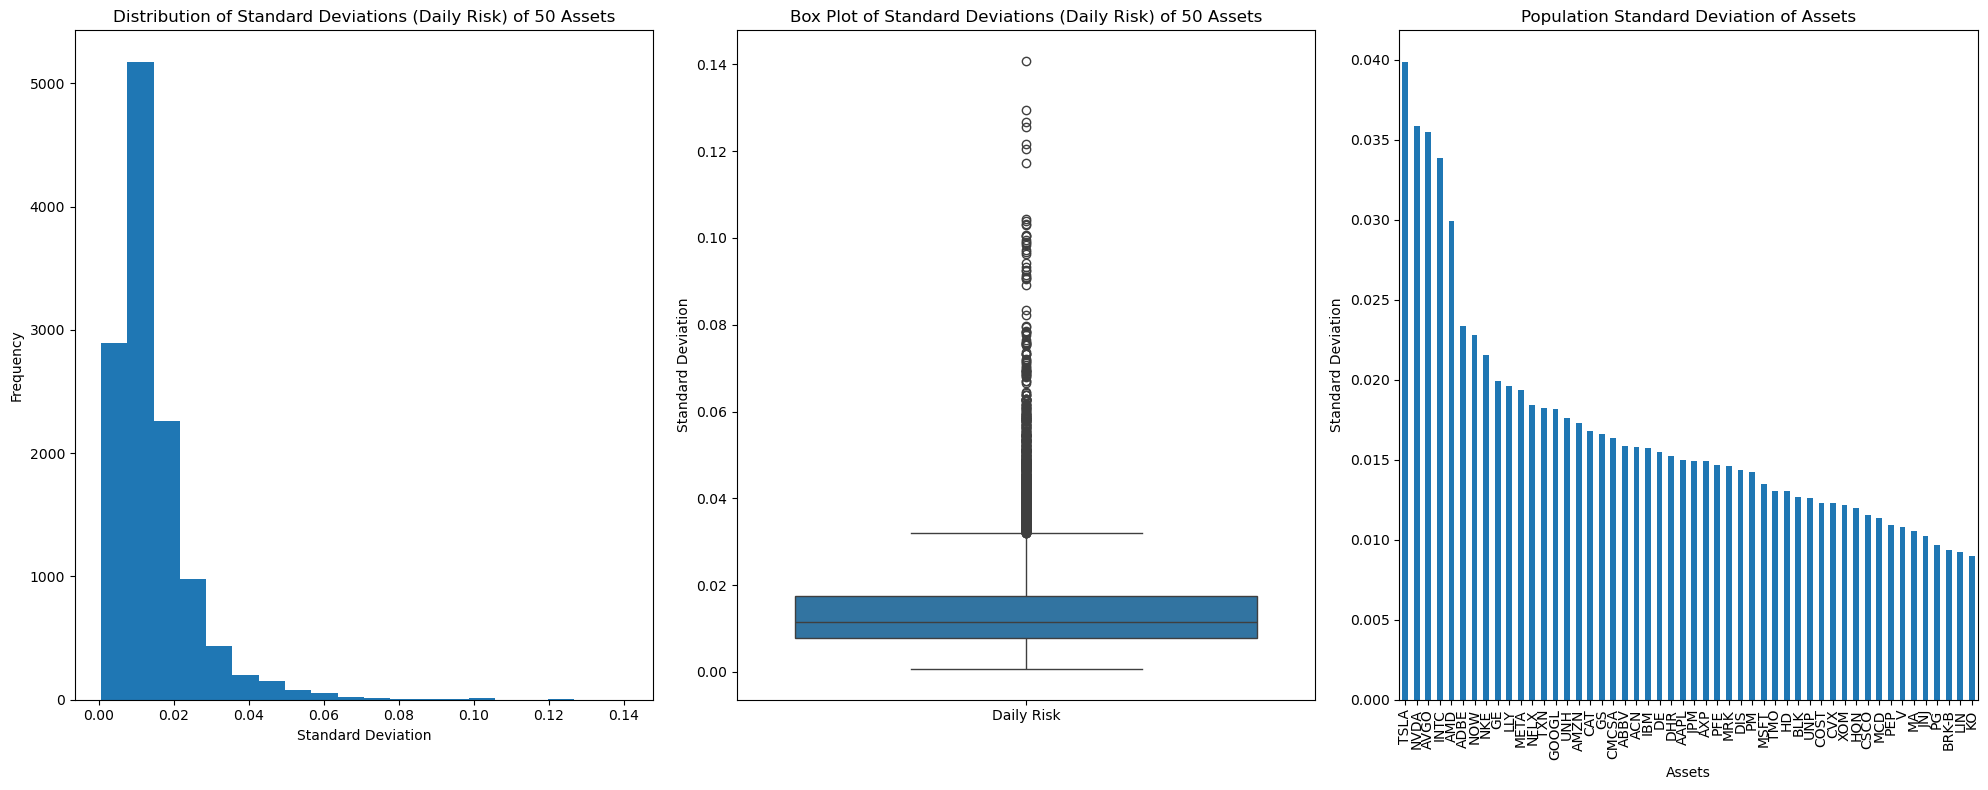

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
std_dev_entire = data['Log Returns'].std().sort_values(ascending=False)

axes[0].hist(rolling_std_dev.values.flatten(), bins=20)
axes[0].set_title('Distribution of Standard Deviations (Daily Risk) of 50 Assets')
axes[0].set_xlabel('Standard Deviation')
axes[0].set_ylabel('Frequency')

sns.boxplot(rolling_std_dev, ax=axes[1])
axes[1].set_title('Box Plot of Standard Deviations (Daily Risk) of 50 Assets')
axes[1].set_ylabel('Standard Deviation')

std_dev_entire.plot(kind='bar', ax=axes[2])
axes[2].set_title('Population Standard Deviation of Assets')
axes[2].set_xlabel('Assets')
axes[2].set_ylabel('Standard Deviation')

plt.tight_layout()
plt.show()

# Intuition
1. Most assets have low daily risk (standard deviation): The majority of the assets have relatively small variations in price, and thus their standard deviations are lower.

2. A few assets have high daily risk (standard deviation): There are some assets with much higher volatility, but these are fewer in number. These assets' returns deviate much more from their mean, which shows up as the right tail of the histogram.

The skewness in volatility should be accounted for during random portfolio generation. If randomly sampled from assets without considering skewness, you might create portfolios that are riskier than expected.
Give lower-risk assets a higher probability of selection, Instead of equal probability, adjust selection based on risk—low-volatility assets get chosen more often.

In [17]:
# Merge with the original dataframe
data = data.join(rolling_std_dev)

In [18]:
data['Daily Risk'].head(10)

,AAPL,ABBV,ACN,ADBE,AMD,AMZN,AVGO,AXP,BLK,BRK-B,...,PFE,PG,PM,TMO,TSLA,TXN,UNH,UNP,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-20,0.003842,0.008253,0.015620,0.031311,0.032087,0.013492,0.010908,0.007812,0.017966,0.007558,...,0.014961,0.006284,0.005962,0.011722,0.037367,0.017781,0.003670,0.012689,0.010292,0.015672
2024-02-21,0.004690,0.008769,0.014766,0.032261,0.031954,0.011513,0.010934,0.006000,0.007752,0.003628,...,0.005821,0.006110,0.005546,0.007998,0.034108,0.007724,0.003310,0.013849,0.010585,0.016511
2024-02-22,0.007638,0.009170,0.017239,0.031040,0.057112,0.019186,0.031648,0.008473,0.007794,0.004819,...,0.007195,0.004332,0.005505,0.006457,0.033316,0.007621,0.004206,0.012663,0.015292,0.015872
2024-02-23,0.008974,0.008085,0.018685,0.038932,0.058901,0.018272,0.032195,0.008050,0.006313,0.004438,...,0.004628,0.004253,0.003948,0.006159,0.020066,0.009953,0.003632,0.012861,0.014712,0.012018


In [19]:
data['Log Returns'].head(10)

,AAPL,ABBV,ACN,ADBE,AMD,AMZN,AVGO,AXP,BLK,BRK-B,...,PFE,PG,PM,TMO,TSLA,TXN,UNH,UNP,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-13,-0.011338,0.001270,-0.012653,-0.016396,-0.002155,-0.021703,-0.010609,-0.012277,-0.029993,-0.007344,...,-0.025262,-0.005361,-0.009041,-0.015220,-0.022089,-0.026611,-0.001527,-0.007261,0.002687,-0.008646
2024-02-14,-0.004821,0.006500,0.022269,0.004592,0.040892,0.013780,0.008409,0.005849,0.009377,0.009780,...,0.005178,-0.004104,0.000336,0.017795,0.025167,0.006482,0.000174,0.018156,0.006325,-0.004946
2024-02-15,-0.001576,0.012365,0.001428,-0.023798,-0.010916,-0.006925,0.002255,0.007699,0.015978,0.011894,...,0.014647,0.008828,-0.002694,0.000547,0.060353,0.017830,0.007593,0.001758,0.012246,0.028256
2024-02-16,-0.008466,0.005084,-0.005479,-0.077041,-0.016485,-0.001709,-0.015606,0.000141,-0.005088,0.006276,...,0.003991,0.003179,0.007502,-0.001332,-0.002498,-0.002055,0.001285,-0.015931,-0.008650,0.000000
2024-02-20,-0.004123,-0.009852,-0.017831,-0.008727,-0.048189,-0.014439,-0.015316,-0.000329,0.005163,0.002853,...,-0.001087,0.006329,-0.000112,0.000547,-0.031447,0.014608,-0.000940,0.002228,-0.012317,-0.009493
2024-02-21,0.004177,-0.003477,-0.005637,-0.006275,-0.008485,0.008997,0.000734,-0.007558,0.009155,0.005145,...,0.002895,0.011853,0.010321,0.008556,0.005199,0.008200,0.001745,0.016772,0.005834,0.020232
2024-02-22,0.011181,0.009151,0.028409,-0.001766,0.101604,0.034913,0.061188,0.014593,0.009871,0.014338,...,-0.004346,0.000997,0.006822,0.013725,0.013463,0.008194,0.008641,0.012613,0.024943,-0.000859
2024-02-23,-0.010085,0.007553,0.016056,0.029094,-0.029803,0.002346,-0.006558,0.002660,0.000184,0.004950,...,0.007594,0.002923,0.004049,0.007501,-0.027944,-0.010574,0.001405,0.009386,-0.000529,-0.008821


In [20]:
data.isnull().sum().sort_values(ascending=False)

Daily Risk  DIS      5
            DHR      5
            DE       5
            CVX      5
            CSCO     5
                    ..
High        COST     0
            CMCSA    0
            CAT      0
            BRK-B    0
            BLK      0
Length: 400, dtype: int64

---

# Cleaning Data and Preprocessing
- Its ideal to drop the missing values generated by the log returns and daily risk columns since using other methods like backward fill uses future data to estimate past values.(bfill may be useful when filling timestamps).
- Forward fill can be used but in this case the missing data is at the startof the dataset and not at the very end hence it can't work in this case.
- In this case the best approach may be to drop the missing values using dropna() ensuring all calculations start on a level playing field.

In [21]:
# Drop rows with missing data
data = data.dropna()

In [22]:
data.isnull().sum().sort_values(ascending=False)

Daily Risk  MRK     0
            META    0
            MCD     0
            MA      0
            LLY     0
                   ..
Adj Close   AMD     0
            ADBE    0
            ACN     0
            ABBV    0
            AAPL    0
Length: 400, dtype: int64

In [23]:
data.describe()

Adj Close                                                              \
             AAPL        ABBV         ACN        ADBE         AMD        AMZN   
count  246.000000  246.000000  246.000000  246.000000  246.000000  246.000000   
mean   212.207481  175.528979  338.344324  504.413698  152.500407  192.982602   
std     25.887233   12.488952   28.547216   43.603755   21.293184   19.450601   
min    164.224564  150.744324  279.392487  405.920013  107.559998  161.020004   
25%    189.114403  165.301147  313.550545  474.830002  138.372505  179.542496   
50%    222.255836  173.720795  341.591583  504.099991  154.010002  186.389999   
75%    229.604328  187.900558  360.792870  539.519989  165.020000  201.637497   
max    258.735504  201.965424  398.250000  586.549988  211.380005  242.059998   

                                                        ...  Daily Risk  \
             AVGO         AXP          BLK       BRK-B  ...         PFE   
count  246.000000  246.000000   246.000000  246.000000  ...  246.000000   
mean   164.728914  256.913701   885.009563  437.187033  ...    0.013506   
std     33.407722   32.355396   106.733925   25.689770  ...    0.006085   
min    119.376137  208.577560   734.400391  396.730011  ...    0.002719   
25%    136.809021  230.618423   788.505066  410.244995  ...    0.009371   
50%    162.805351  248.116776   855.965851  442.055008  ...    0.012492   
75%    176.167984  286.184647   995.838852  459.684990  ...    0.016945   
max    249.331955  325.869995  1075.500000  483.079987  ...    0.035066   

                                                                               \
               PG          PM         TMO        TSLA         TXN         UNH   
count  246.000000  246.000000  246.000000  246.000000  246.000000  246.000000   
mean     0.008518    0.011115    0.011224    0.035453    0.017035    0.014634   
std      0.004923    0.008507    0.005862    0.017576    0.008073    0.009513   
min      0.002063    0.002052    0.002581    0.004350    0.003161    0.003050   
25%      0.005202    0.006380    0.007007    0.023776    0.010897    0.008211   
50%      0.007216    0.008981    0.010438    0.031887    0.015139    0.011467   
75%      0.010822    0.012983    0.013323    0.043155    0.021390    0.019458   
max      0.032454    0.048569    0.038211    0.094121    0.043069    0.044453   

                                           
              UNP           V         XOM  
count  246.000000  246.000000  246.000000  
mean     0.011205    0.009623    0.011171  
std      0.005741    0.004888    0.004705  
min      0.002730    0.002522    0.001564  
25%      0.007316    0.006562    0.007603  
50%      0.010235    0.008447    0.010625  
75%      0.013826    0.010559    0.014704  
max      0.033318    0.029542    0.022706  

[8 rows x 400 columns]

In [24]:
data.columns.get_level_values(0).unique()

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Log Returns',
       'Daily Risk'],
      dtype='object')

In [25]:
data.shape

(246, 400)

---
# Generate random Weights

In [26]:
n_assets = 50  # Number of assets
n_portfolios = 1000  # Number of random portfolios

# Initialize an empty array to store portfolio weights
random_portfolios = np.zeros((n_portfolios, n_assets))

random_portfolios.shape

(1000, 50)

In [27]:
for i in range(n_portfolios):
    weights = np.random.rand(n_assets)  # Generate random values
    # Normalize to sum to 1, This divides each element by the sum of all elements, it is the shorthand for weights = weights / np.sum(weights)
    weights /= np.sum(weights)  
    # copies the weights array into the i-th row of random_portfolios.
    random_portfolios[i] = weights  

# Check if all portfolios sum to 1
print(random_portfolios[:5], np.sum(random_portfolios, axis=1)[:5])  # Show first 5 portfolios

[[2.78127103e-02 1.62894057e-04 2.27955651e-02 4.23110432e-05
  2.61525472e-02 2.63966234e-02 3.06132030e-02 1.94383315e-02
  2.15538429e-02 3.97818518e-02 3.97949689e-02 1.73601646e-03
  2.21279222e-03 3.13711550e-02 9.07739018e-03 8.18979514e-03
  1.61769878e-02 2.23975456e-02 2.32722470e-03 1.80197742e-02
  6.00571898e-03 1.28793270e-02 1.13590200e-02 2.86473160e-02
  1.22940785e-02 1.17805671e-03 3.94637504e-02 3.17303049e-02
  4.68181663e-02 3.63242092e-02 7.38964365e-03 3.05927852e-02
  9.46073125e-03 8.20078159e-03 3.00506363e-02 3.67723156e-02
  2.57822213e-02 2.13356245e-02 9.72578547e-03 1.69095420e-02
  2.80549300e-02 2.01246937e-02 3.96563331e-02 1.70815430e-05
  4.05512019e-02 1.17634304e-02 2.97561642e-02 2.50088773e-02
  8.55980820e-03 7.53393421e-03]
 [6.39222311e-03 7.38803644e-03 1.97238461e-02 2.86382491e-02
  1.56653849e-02 3.61499815e-02 1.07692495e-02 1.98831100e-02
  3.19694733e-02 3.36510816e-02 2.06939293e-02 9.67414374e-03
  3.18279588e-02 2.74816860e-02 1.551

---
# Simulate Portfolio Performance
1. Calculate expected returns. 
    $$
    E(R_p)=
    \sum_{i=1}^{n} w_i .E(R_i)   
    $$
    Where
    $$
    E(R_i) = 
    \frac{1}{n}\sum_{i=1}^{n}\text{Log Returns}
    $$
2. Calculate covariance.
    $$
    \text{cov}(R_i,R_j) = 
    \frac{1}{N - 1}\sum_{n=1}^{N}(R_\text{i,n} - \bar{R_i})(R_\text{j,n} - \bar{R_j})
    $$ 

3. Calculate expected risk (volatility).
    $$ 
    \sigma_p = \sqrt{\sum_{i=1}^{N}w_i^2 \sigma_i^2 + \sum_{\substack{j=i \\ j \neg i}}^{n}w_i.w_j.\text{cov}(R_i,R_j)}
    $$
    - The first sum accounts for the variances of individual assets $(\sigma_i^2)$ weighted by $(w_i^2)$
    - The second sum accounts for covariances between different assets $(\text{cov}(R_i,R_j))$, weighted by $w_i, w_j$
    $$
    \sigma_p = \sqrt{\mathbf{w}^T \mathbf{\Sigma} \mathbf{w}}
    $$
    - Where:
        - $w$ is a (1000, 50) matrix (each row is a random portfolio's weight)
        - $\mathbf{\Sigma}$ is a (50,50) covariance matrix
        - The result is a (1000, 1) matrix (one risk value per portfolio)
    - Intuition
    $$
    \mathbf{w} = 
    \begin{bmatrix}
    w_1 \\w_2 \\w_3 \\\vdots \\w_{n}
    \end{bmatrix}
    $$
    
    $$ 
    \mathbf{\Sigma} =
    \begin{bmatrix}
        \sigma_1^2 & \text{cov}(R_1, R_2) & \dots & \text{cov}(R_1, R_N) \\
        \text{cov}(R_2, R_1) & \sigma_2^2 & \dots & \text{cov}(R_2, R_N) \\
        \vdots & \vdots & \ddots & \vdots \\
        \text{cov}(R_N, R_1) & \text{cov}(R_N, R_2) & \dots & \sigma_N^2
    \end{bmatrix}
    $$ 
    
    $$
    \mathbf{w^T\Sigma} =
    \begin{bmatrix}
    w_1 & w_2 & \cdot & w_n
    \end{bmatrix}
    \begin{bmatrix}
        \sigma_1^2 & \text{cov}(R_1, R_2) & \dots & \text{cov}(R_1, R_N) \\
        \text{cov}(R_2, R_1) & \sigma_2^2 & \dots & \text{cov}(R_2, R_N) \\
        \vdots & \vdots & \ddots & \vdots \\
        \text{cov}(R_N, R_1) & \text{cov}(R_N, R_2) & \dots & \sigma_N^2
    \end{bmatrix}    
    $$
    Each element of the resulting row vector is computed as:
    $$
    \mathbf{w^T\Sigma} =
    \sum_{i=1}^{N} w_i . \text{cov}(R_i,R_j)
    $$

    $$
    \mathbf{w^T\Sigma w} =
    \begin{bmatrix}
        \sum_{i=1}^{N} w_i \cdot \text{cov}(R_i,R_1) & \sum_{i=1}^{N} w_i \cdot \text{cov}(R_i,R_2) & \dots & \sum_{i=1}^{N} w_i \cdot \text{cov}(R_i,R_N)
    \end{bmatrix}
    \begin{bmatrix}
        w_1 \\w_2 \\\vdots \\w_{n}
    \end{bmatrix}    
    $$
    This multiplication is a dot product, so the result is a scalar (a single number):
    $$
    \mathbf{w^T\Sigma w} =
    \sum_{j=1}^{N}(\sum_{i=1}^{N}w_i \cdot \text{cov}(R_i,R_j)) \cdot w_j
    $$
    The double summation can be rewritten by combining the terms:
    $$
    \mathbf{w^T\Sigma w} =
    \sum_{j=1}^{N}\sum_{i=1}^{N}(w_j \cdot w_i \cdot \text{cov}(R_i, R_j))
    $$
    - This is the explicit form of the matrix multiplication. It sums over all possible pairs of assets ($i$ and $j$), weighting their covariances by the product of their weights
    $(w_i, w_j)$
    - The double summation $\sum_{j=1}^{N}\sum_{i=1}^{N}(w_j \cdot w_i \cdot \text{cov}(R_i, R_j))$ include:
        - Diagonal terms $(i = j)$: hese are the terms where $\text{cov}(R_i, R_j) = \sigma_I^2$ so they become $w_i^2 \cdot \sigma_i^2$
        - Off-diagonal terms $(i \neg j)$: These are the terms where $\text{cov}(R_i, R_j)$ captures the covariance between different assets.
    - Thus, the matrix multiplication naturally includes both the individual asset risks $(w_i^2 \sigma_i^2$) and the interactions between assets $(w_iw_j\text{cov}(R_i,R_j))$, matching the expanded formula:
    $$
    \sigma_p =
    \sqrt{sum_{i=1}^{N}w_i^2 \sigma_i^2 + \sum_{\substack{j=i \\ j \neg i}}^{n}w_i.w_j.\text{cov}(R_i,R_j)}
    $$

In [28]:
# Calculate expected returns of individual assets
expected_returns = data['Log Returns'].mean()
expected_returns.shape

(50,)

In [29]:
print(expected_returns)

AAPL     0.001010
ABBV     0.000461
ACN      0.000270
ADBE    -0.000712
AMD     -0.001821
AMZN     0.001289
AVGO     0.002636
AXP      0.001573
BLK      0.000985
BRK-B    0.000618
CAT      0.000540
CMCSA   -0.000513
COST     0.001566
CSCO     0.001158
CVX      0.000201
DE       0.001174
DHR     -0.000857
DIS     -0.000058
GE       0.002311
GOOGL    0.001140
GS       0.002215
HD       0.000663
HON      0.000282
IBM      0.001377
INTC    -0.002925
JNJ      0.000085
JPM      0.001837
KO       0.000649
LIN      0.000315
LLY      0.000429
MA       0.000785
MCD      0.000343
META     0.001720
MRK     -0.001475
MSFT     0.000096
NFLX     0.002219
NKE     -0.001444
NOW      0.001126
NVDA     0.002455
PEP     -0.000412
PFE     -0.000073
PG       0.000396
PM       0.002236
TMO     -0.000008
TSLA     0.002018
TXN      0.000564
UNH      0.000158
UNP      0.000108
V        0.000967
XOM      0.000399
dtype: float64


- random_portfolios is a (1000 × num_assets) matrix, where each row is a different portfolio’s weights.
- expected_returns is a (num_assets × 1) column vector of asset expected returns.
- The @ operator performs matrix multiplication, resulting in a (1000 × 1) array, where each row is the expected return of a portfolio.

In [30]:
portfolio_expected_returns = random_portfolios @ expected_returns
portfolio_expected_returns.shape

(1000,)

In [31]:
print(portfolio_expected_returns)

[0.0007228  0.00074147 0.00038266 0.00076252 0.00061542 0.00058576
 0.00076401 0.00062897 0.00069304 0.00070628 0.00052172 0.0006545
 0.0006994  0.00057282 0.00066199 0.00060833 0.000642   0.00057916
 0.0006497  0.00066851 0.00056502 0.00055796 0.00067338 0.00059985
 0.00065275 0.00054912 0.00059954 0.00059719 0.00068902 0.0005574
 0.00063071 0.00073416 0.00063083 0.00066315 0.00060671 0.0006618
 0.00073085 0.00065115 0.00054115 0.00062966 0.00051776 0.00082852
 0.00070423 0.00061519 0.00047562 0.00058143 0.0006987  0.00052799
 0.00052548 0.00053557 0.00057871 0.00077116 0.00077495 0.0004913
 0.0006906  0.00061434 0.00052547 0.00059084 0.00044281 0.00071131
 0.00069285 0.00056887 0.00071195 0.0005696  0.00068419 0.00060321
 0.00057121 0.00057264 0.00068658 0.00061552 0.00068467 0.00049667
 0.00068478 0.000432   0.00077526 0.00051322 0.00054824 0.00045695
 0.0004416  0.00050803 0.00052727 0.00065941 0.00061646 0.00054173
 0.00047601 0.00068923 0.00057224 0.00065103 0.00062635 0.00065939

In [33]:
cov_matrix = data['Log Returns'].cov()
cov_matrix.head()

,AAPL,ABBV,ACN,ADBE,AMD,AMZN,AVGO,AXP,BLK,BRK-B,...,PFE,PG,PM,TMO,TSLA,TXN,UNH,UNP,V,XOM
AAPL,0.000226,-0.000002,0.000038,0.000060,0.000121,8.991253e-05,0.000125,0.000022,0.000054,0.000027,...,0.000017,-0.000002,0.000011,0.000006,0.000213,0.000075,9.997304e-07,0.000009,0.000020,1.890598e-06
ABBV,-0.000002,0.000254,0.000010,0.000028,-0.000042,7.146796e-08,-0.000042,0.000023,0.000017,0.000034,...,0.000071,0.000039,0.000061,0.000061,-0.000085,0.000012,4.226663e-05,0.000039,0.000031,4.205869e-05
ACN,0.000038,0.000010,0.000251,0.000106,0.000077,6.729294e-05,0.000035,0.000046,0.000029,0.000040,...,0.000033,0.000017,0.000007,0.000044,0.000027,0.000040,4.120063e-05,0.000047,0.000049,1.573177e-07
ADBE,0.000060,0.000028,0.000106,0.000526,0.000100,1.561745e-04,0.000188,0.000077,0.000049,0.000038,...,0.000009,-0.000008,0.000004,0.000045,0.000134,0.000062,3.654342e-05,0.000046,0.000051,6.579232e-06
AMD,0.000121,-0.000042,0.000077,0.000100,0.000900,1.822471e-04,0.000524,0.000100,0.000105,0.000024,...,-0.000023,-0.000041,-0.000042,0.000024,0.000374,0.000261,6.365527e-06,0.000039,0.000027,2.869241e-05
